In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.modeling import models, fitting
from photutils import RectangularAperture, aperture_photometry
import glob, pdb, mpld3
from mpld3 import plugins
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = (12, 6)
mpld3.enable_notebook()

In [27]:
fnames = np.sort(glob.glob('../hst_archive/*_flt.fits'))
# ascii.write(fnames.reshape((396, 1)), 'filenames.csv', overwrite = True)
len(fnames)

396

In [3]:
img_list = []
hdr_list = []
for fn in fnames:
    hdu = fits.open(fn)
    header = hdu[0].header
    if header['OBSTYPE'] == 'SPECTROSCOPIC':
        image = hdu[1].data
        img_list.append(image)
        hdr_list.append(header)
    hdu.close()
len(img_list)

392

(128, 128)

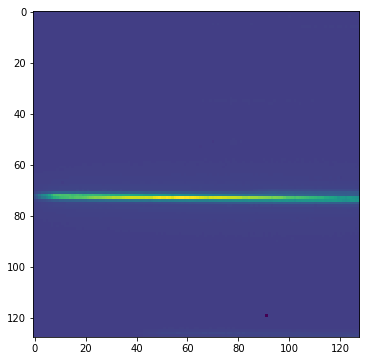

In [4]:
plt.imshow(img_list[20])
img_list[20].shape

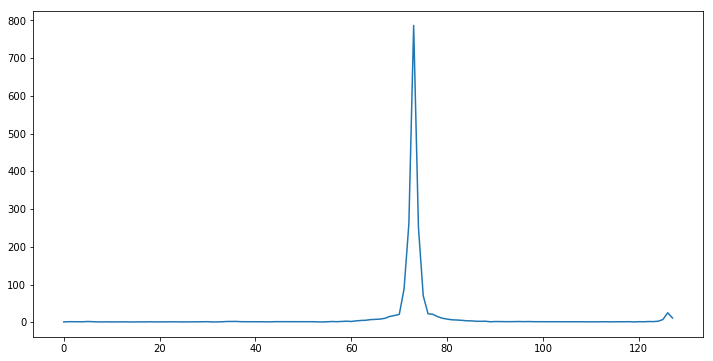

In [5]:
plt.plot(img_list[20][:, 64])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      amplitude        mean         stddev    
    ------------- ------------- --------------
    781.162044753 72.9903055426 0.682920881808


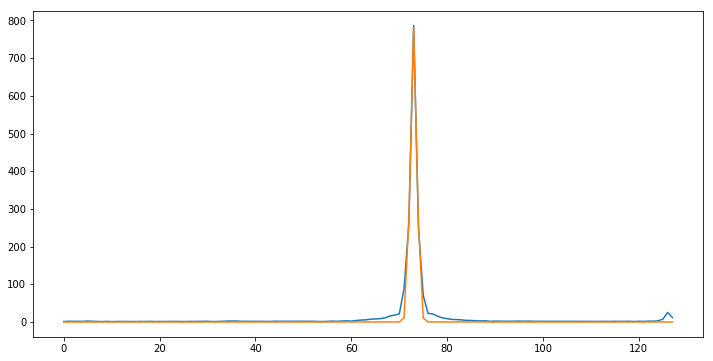

In [6]:
# Fitting gaussian to a column of the spectrum (x=65)

im = img_list[20]
x = range(im.shape[0])
y = im[:, 64]

g_init = models.Gaussian1D(amplitude=760., mean=75., stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)
print(g)

plt.plot(x, y)
plt.plot(x, g(x))

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      amplitude        mean         stddev    
    ------------- ------------- --------------
    75110.0495283 72.9425734015 0.842034094733


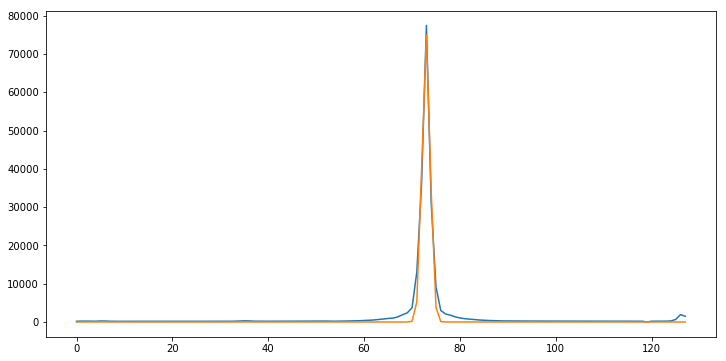

In [7]:
collapsing_spectrum = np.sum(im, axis = 1)

g_init = models.Gaussian1D(amplitude=76000., mean=75., stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, collapsing_spectrum)
print(g)

plt.plot(x, collapsing_spectrum)
plt.plot(x, g(x))

Applying centering to every image

In [40]:
centers = []
for im in img_list:
    x_cen  = im.shape[0]/2
    x      = range(im.shape[0])
    y      = im[:, x_cen]
    g_init = models.Gaussian1D(amplitude=760., mean=75., stddev=1.)
    fit_g  = fitting.LevMarLSQFitter()
    g      = fit_g(g_init, x, y)
    y_cen  = g.mean[0]
    centers.append([x_cen, y_cen])
centers = np.array(centers)
# ascii.write(centers, 'centers.csv', comment = 'center for all visits according to the ordering of filenames.scv',
#             overwrite = True)

C:\Users\Rafia\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
